In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import scipy
import anndata


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

sc.set_figure_params(figsize=(4, 4))

palette = ['#199de5', '#fbbc04']

sc.settings.figdir = './figures_germcells/'

In [2]:
def Barplot(which_var, adata, var='clusters', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
#     ax1.figure.savefig('barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
#                        dpi=300, orientation='landscape', format= 'pdf', optimize=True)

# Germcells cells

In [3]:
adata = sc.read('/nfs/team292/vl6/Monkey_Zhao/germ_cells.h5ad')

In [9]:
# Add old cluster subname
adata.obs['celltype'] = adata.obs['germcells_annotation']
adata.obs['celltype'].values.describe()

,counts,freqs
categories,,
PGC,90,0.033520
oocyte,453,0.168715
oogonia_STRA8,1053,0.392179
oogonia_meiotic,863,0.321415
pre_oocyte,226,0.084171


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


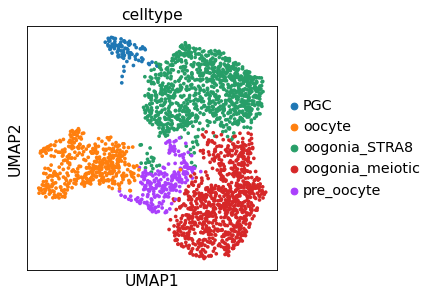

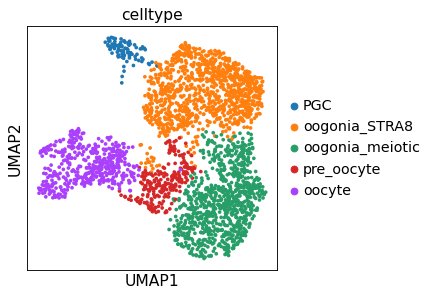

In [10]:
sc.pl.umap(adata, color=['celltype'])
adata.obs['celltype'].cat.reorder_categories(['PGC',  'oogonia_STRA8','oogonia_meiotic', 'pre_oocyte', 'oocyte'], inplace=True)
sc.pl.umap(adata, color=['celltype'])

In [11]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))

Total number of cells: 2685
Total number of genes: 14871


## Plot cellphoneDB genes

In [12]:
cellphoneDB_genes = {
    'cortex':{'ACVR2B', 'BMPR1A', 'IGF1R', 'PTGES2', 'PTGES3',  'PDGFB', 'PNMT',
                  'EFNA4','EPHB4','CXCL12','CXCL14','KIT','ERBB3', 'DLL3'},
    'medulla':{'DLK1', 'ESR1', 'HSD17B12',  'BMP4',  'ACVR2B', 'BMPR1A',
                  'RBP4','PTH1R', 'RARA', 'CRABP2', 'EPHB6', 'CYP11A1', 'CYP19A1'},
    'follicle':{'ESR2',  'BMP6', 'GDF9', 'JAG1', 'SIRPA', 'HDC', 'NRG4', 'ALDH1A', 'CMKLR1','TGFA', 'DCC' }
}

In [13]:
cellphoneDB_genes_sorted = []

for group in cellphoneDB_genes.keys():
    cellphoneDB_genes[group] = [ i for i in cellphoneDB_genes[group] if i in adata.var_names ]
    cellphoneDB_genes[group] = sorted(cellphoneDB_genes[group])
    
    
genes = [item for sublist in cellphoneDB_genes.values() for item in sublist]

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


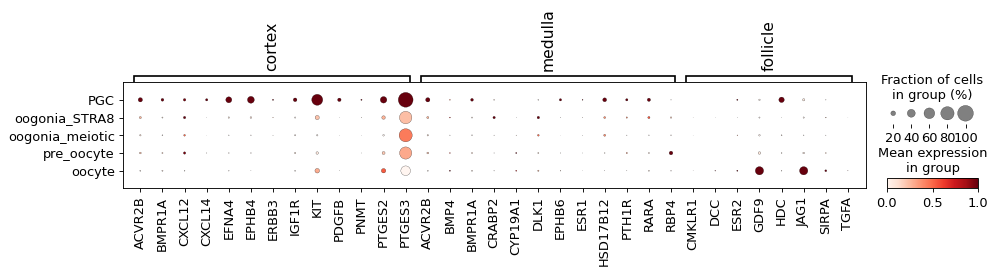

In [14]:
sc.pl.dotplot(adata, cellphoneDB_genes, groupby='celltype', standard_scale = 'var', save='_macaque_cellphoneDB_germcells.pdf')